# Error Propagation

## Author(s), contact(s), and dates:
- Author: Nan Normann Jakobsen
- Email:  nnj@chem.ku.dk
- Date:   18th of January 2023 (latest update)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
import sys 
sys.path.append('../External_Functions')
from ExternalFunctions import nice_string_output, add_text_to_ax
from scipy import stats
from sympy import *
from scipy.integrate import quad

In [59]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [60]:
def get_weigthed_mean(x, ex):
    mu_w = np.sum(x / ex**2) / np.sum(1 / ex**2)
    sigma_wmean = np.sqrt(1 / np.sum(1 / ex**2))
    return mu_w, sigma_wmean

## Problem 2.1

In [61]:
v_sound = np.array([1532, 1458, 1499, 1394, 1432, 1565, 1474, 1440, 1507])
sigma_v = np.array([67, 55, 74, 129, 84, 19, 10, 17, 14])

### 2.1.1

In [62]:
mean_v, sigma_mean_v = get_weigthed_mean(v_sound, sigma_v)
print('Mean speed of sound:', mean_v, '+-', sigma_mean_v)

Mean speed of sound: 1487.6611219720476 +- 6.700988009461739


### 2.1.2

In [63]:
mean_first5, sigma_first5 = get_weigthed_mean(v_sound[:5], sigma_v[:5])
mean_last4, sigma_last4 = get_weigthed_mean(v_sound[5:], sigma_v[5:])

print('Mean speed of sound for first five measurements:', mean_first5, '+-', sigma_first5)
print('Mean speed of sound for last four measurements:', mean_last4, '+-', sigma_last4)

Mean speed of sound for first five measurements: 1475.532143668687 +- 32.65505290822605
Mean speed of sound for last four measurements: 1488.1943157970413 +- 6.846692729237678


### 2.1.3

Using all 9 points

In [64]:
Minuit.print_level = 0

y = v_sound
ey = sigma_v
x = np.arange(len(v_sound))

def fit_func(x, a):
    return np.zeros_like(x) + a

def chi2_calc(a):
    y_fit = fit_func(x, a)
    chi2 = np.sum(((y - y_fit) / ey)**2)
    return chi2
chi2_calc.errordef = 1.0

# Here we let Minuit know, what to minimise, how, and with what starting parameters:   
minuit = Minuit(chi2_calc, a = mean_v) # initial guess

# Perform the actual fit:
minuit.migrad()

Nvar = 1                    # Number of variables
Ndof_fit = len(y) - Nvar    # Number of degrees of freedom = Number of data points - Number of variables

# Get the minimal value obtained for the quantity to be minimised (here the Chi2)
Chi2 = minuit.fval                          # The chi2 value
Prob = stats.chi2.sf(Chi2, Ndof_fit)    # The chi2 probability given N degrees of freedom

print(Chi2, Prob)

29.921736012329852 0.00021821843006459462


In [65]:
chi2_contributions = []

for i in range(len(y)):
    chi2 = (y[i] - fit_func(x[i], *minuit.values))**2 / ey[i]**2
    chi2_contributions.append(chi2)

print('chi2 contributions:', chi2_contributions)

chi2 contributions: [0.43794522271722947, 0.2908370765754324, 0.023478844947549756, 0.5271561666403926, 0.4390817033995403, 16.56870375241691, 1.8662625353516082, 7.860147223648426, 1.908123486632762]


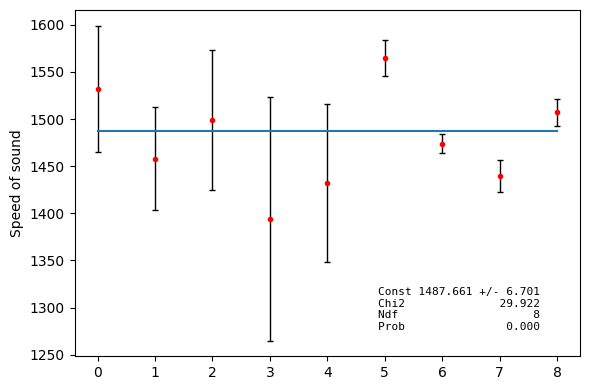

In [66]:
fig, ax = plt.subplots(figsize = (6, 4))
x_val = np.linspace(0, 8, 1000)

ax.errorbar(x, y, ey, fmt = ".", color='r', ecolor='k', elinewidth=1, capsize=2, capthick=1)
ax.plot(x_val, fit_func(x_val, *minuit.values))

ax.set( ylabel="Speed of sound")

# Define figure text
d = {'Const': [minuit.values[0], minuit.errors[0]],
     'Chi2': Chi2,
     'Ndf': Ndof_fit,
     'Prob': Prob
    }

# Plot figure text
text = nice_string_output(d, extra_spacing=1, decimals=3)
add_text_to_ax(0.6, 0.2, text, ax, fontsize=8)

fig.tight_layout()
fig.savefig('Consitent.png', dpi = 150)

Using only the first five points

In [67]:
Minuit.print_level = 0

y = v_sound[:5]
ey = sigma_v[:5]
x = np.arange(len(v_sound[:5]))

def fit_func(x, a):
    return np.zeros_like(x) + a

def chi2_calc(a):
    y_fit = fit_func(x, a)
    chi2 = np.sum(((y - y_fit) / ey)**2)
    return chi2
chi2_calc.errordef = 1.0

# Here we let Minuit know, what to minimise, how, and with what starting parameters:   
minuit = Minuit(chi2_calc, a = mean_v) # initial guess

# Perform the actual fit:
minuit.migrad()

Nvar = 1                    # Number of variables
Ndof_fit = len(y) - Nvar    # Number of degrees of freedom = Number of data points - Number of variables

# Get the minimal value obtained for the quantity to be minimised (here the Chi2)
Chi2 = minuit.fval                          # The chi2 value
Prob = stats.chi2.sf(Chi2, Ndof_fit)    # The chi2 probability given N degrees of freedom

print(Chi2, Prob)

1.5805407712207569 0.8122852367227693


In [68]:
chi2_contributions = []

for i in range(len(y)):
    chi2 = (y[i] - fit_func(x[i], *minuit.values))**2 / ey[i]**2
    chi2_contributions.append(chi2)

print('chi2 contributions:', chi2_contributions)

chi2 contributions: [0.7103182887099814, 0.1016119212616672, 0.1005734624768752, 0.3994646026156986, 0.2685724961565345]


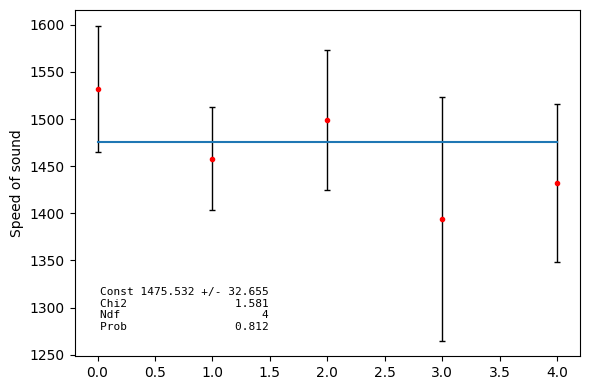

In [69]:
fig, ax = plt.subplots(figsize = (6, 4))
x_val = np.linspace(0, 4, 1000)

ax.errorbar(x, y, ey, fmt = ".", color='r', ecolor='k', elinewidth=1, capsize=2, capthick=1)
ax.plot(x_val, fit_func(x_val, *minuit.values))

ax.set( ylabel="Speed of sound")

# Define figure text
d = {'Const': [minuit.values[0], minuit.errors[0]],
     'Chi2': Chi2,
     'Ndf': Ndof_fit,
     'Prob': Prob
    }

# Plot figure text
text = nice_string_output(d, extra_spacing=1, decimals=3)
add_text_to_ax(0.05, 0.2, text, ax, fontsize=8)

fig.tight_layout()
fig.savefig('Consitent_first5.png', dpi = 150)

### 2.1.4

In [70]:
v_sound_water = 1481

In [78]:
z = (mean_v - v_sound_water) / sigma_mean_v
print(z)

0.9940507224669137


In [83]:
def gauss(x):
    return stats.norm.pdf(x, loc = 0, scale = 1)

prop = quad(gauss, -z, z)
print(1-prop[0])

0.32019817409081885


## Problem 2.2

In [72]:
A, sigma_A = 1.01, 0.19
gam, sigma_gam = 0.12, 0.05
omega, sigma_omega = 0.47, 0.06

### 2.2.1

In [73]:
# Define variables:
x, a, g, w, t = symbols('x, A, gamma, omega, t')
dx, da, dg, dw = symbols('sigma_x, sigma_A, sigma_gamma, sigma_omega')

# Define relation, and print:
x = a * exp(-g*t) * cos(w*t)
lprint(latex(Eq(symbols('x'), x)))

# Calculate uncertainty and print:
dx = sqrt((x.diff(a) * da)**2 + (x.diff(g) * dg)**2 + (x.diff(w) * dw)**2)
lprint(latex(Eq(symbols('sigma_x'), dx)))

# Turn expression into numerical functions 
fx = lambdify((a, g, w, t), x)
fdx = lambdify((a, da, g, dg, w, dw, t), dx)

# Define values and their errors
va, vda = A, sigma_A
vg, vdg = gam, sigma_gam
vw, vdw = omega, sigma_omega
vt = 1

# Numerically evaluate expressions and print
vx = fx(va, vg, vw, vt)
vdx = fdx(va, vda, vg, vdg, vw, vdw, vt)
lprint(fr'x(1) = {vx:.1f} \pm {vdx:.1f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 2.2.2

In [88]:
# Define variables:
x, a, g, w, t = symbols('x, A, gamma, omega, t')
dx_a, dx_g, dx_w, da, dg, dw = symbols('sigma_x_a, sigma_x_gamma, sigma_x_omega, sigma_A, sigma_gamma, sigma_omega')

# Define relation:
x = a * exp(-g*t) * cos(w*t)

# Calculate uncertainty and print:
dx_a = (x.diff(a) * da)**2
dx_g = (x.diff(g) * dg)**2
dx_w = (x.diff(w) * dw)**2
lprint(latex(Eq(symbols('sigma_x_a'), dx_a)))
lprint(latex(Eq(symbols('sigma_x_gamma'), dx_g)))
lprint(latex(Eq(symbols('sigma_x_omega'), dx_w)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [89]:
t = np.linspace(0, 20, 10000)
sigma_x_a = sigma_A**2 * np.exp(-2 * gam * t) * (np.cos(omega * t))**2
sigma_x_g = A**2 * sigma_gam**2 * t**2 * np.exp(-2 * gam * t) * (np.cos(omega * t))**2
sigma_x_w = A**2 * sigma_omega**2 * t**2 * np.exp(-2 * gam * t) * (np.sin(omega * t))**2

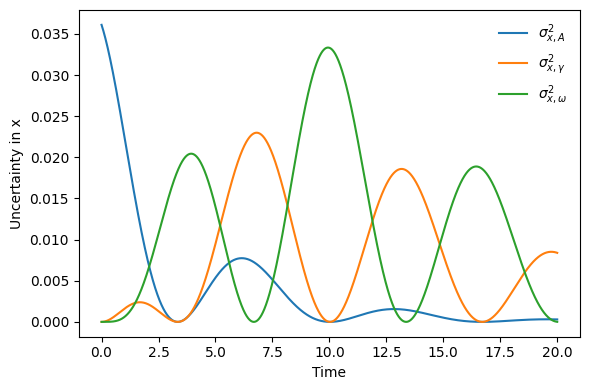

In [90]:
fig, ax = plt.subplots(figsize = (6, 4))

ax.plot(t, sigma_x_a, label = r'$\sigma_{x,A}^{2}$')
ax.plot(t, sigma_x_g, label = r'$\sigma_{x,\gamma}^{2}$')
ax.plot(t, sigma_x_w, label = r'$\sigma_{x,\omega}^{2}$')

ax.legend(frameon=False)
ax.set(xlabel = 'Time', ylabel = 'Uncertainty in x')

fig.tight_layout()
fig.savefig('uncertainty_position.png', dpi = 200)